In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Loading the Dataset**

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### https://github.com/mwaskom/seaborn-data?tab=readme-ov-file

https://www.kaggle.com/c/titanic/data

- survived = se o passageiro sobreviveu
- pclass = tipo de classe do ticket do passageiro (1ª classe, 2ª classe, etc)
- sex = sexo do passageiro
- age = idade
- sibsp = número de conjuges no navio
- parch = número de parentes no navio
- fare = valor do ticket
- embarked = por qual porto embarcou no navio
- class = classe dos passageiros
- who = se é homem, mulher ou criança (male, female, child)
- adult_male = indica se é um homem adulto ou não
- deck = qual deck o passageiro estava no navio (A a G)
- embark_town = Cidade onde embarbou
- alive = se ainda está vivo ou não
- alone = se o passageiro estava sozinho no navio

# **Análise inicial do Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.drop(["embarked","class", "alive"], axis = 1, inplace = True)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


# **Exploratory Data Analysis (EDA)**

In [8]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

In [9]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [10]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

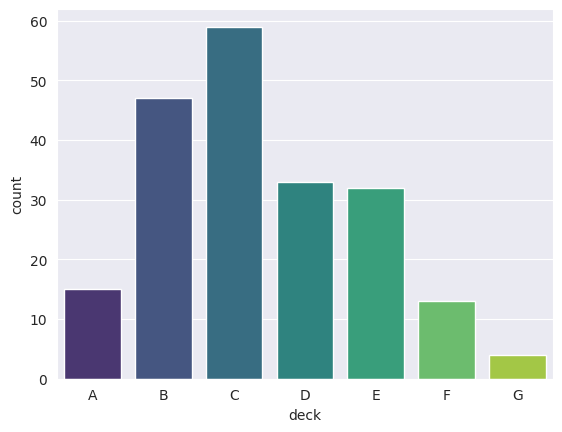

In [11]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, palette = "viridis")

<Axes: xlabel='deck', ylabel='count'>

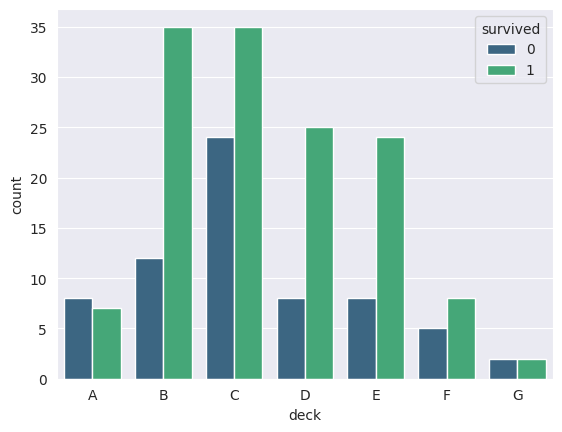

In [12]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", hue = "survived", data = df, palette = "viridis")

In [13]:
df.drop(["deck"], axis = 1, inplace = True)

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

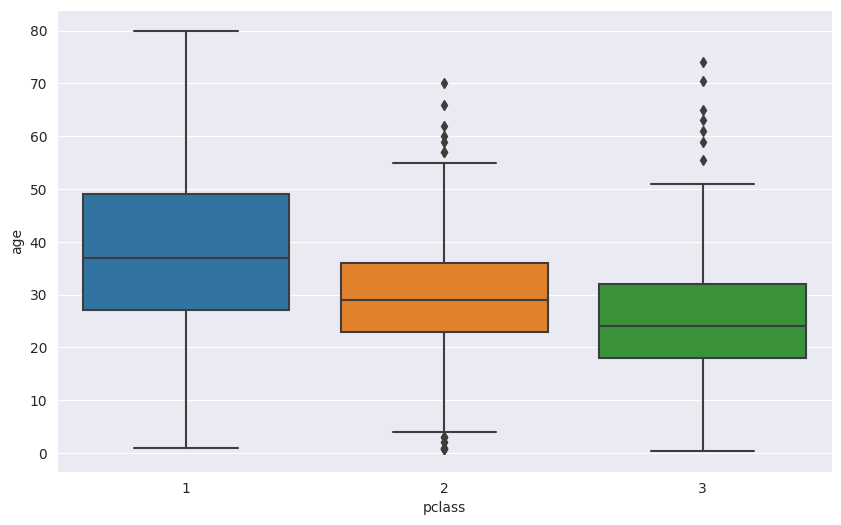

In [15]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "pclass", y = "age", data = df)

In [16]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age

In [17]:
df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)

In [18]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [19]:
df.dropna(inplace = True)

In [20]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


<Axes: xlabel='survived', ylabel='count'>

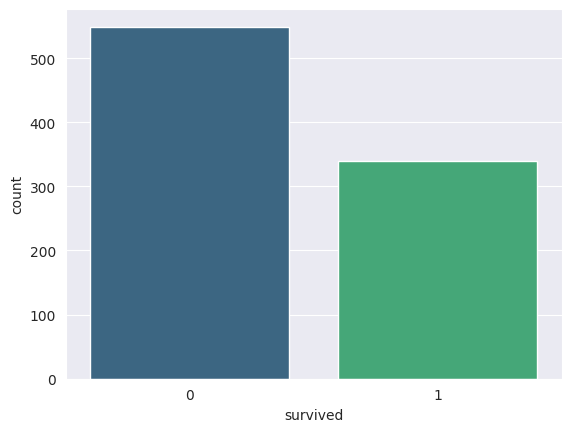

In [21]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", data = df, palette = "viridis")

In [22]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

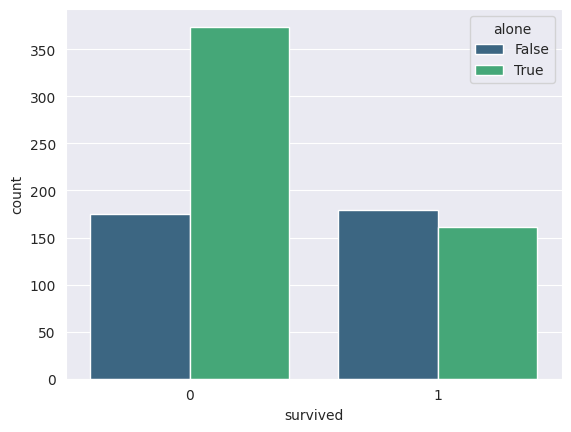

In [23]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "alone",data = df, palette = "viridis")

<Axes: xlabel='survived', ylabel='count'>

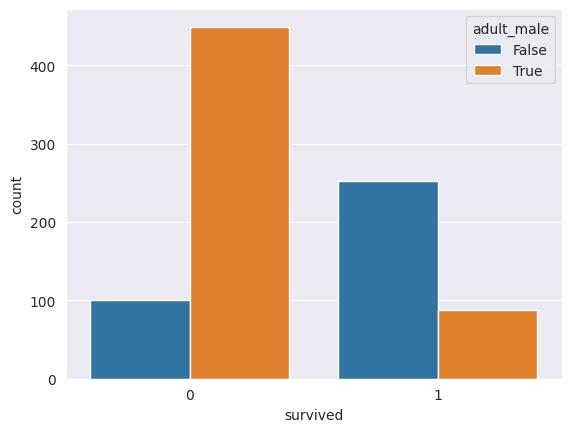

In [24]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "adult_male",data = df)

<Axes: xlabel='survived', ylabel='count'>

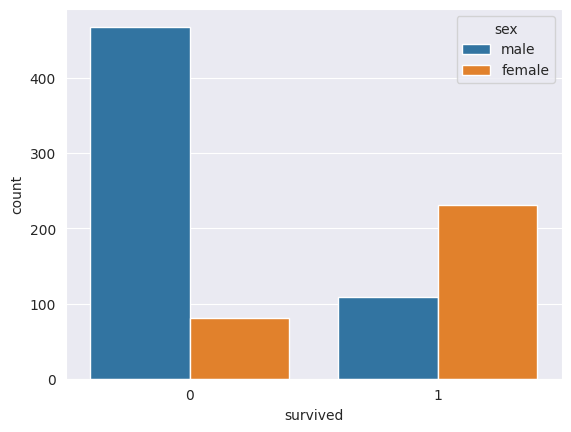

In [25]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "sex",data = df)

<Axes: xlabel='survived', ylabel='count'>

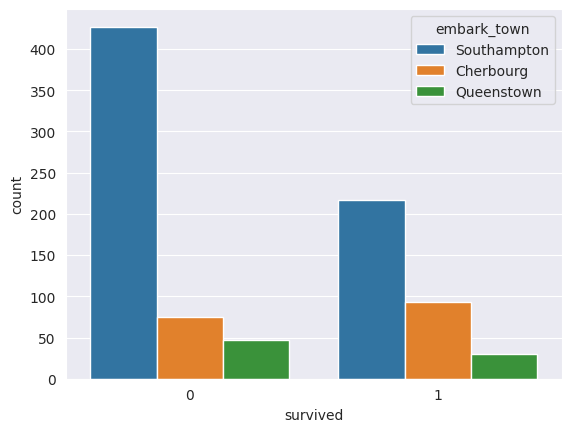

In [26]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "embark_town",data = df)

In [27]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

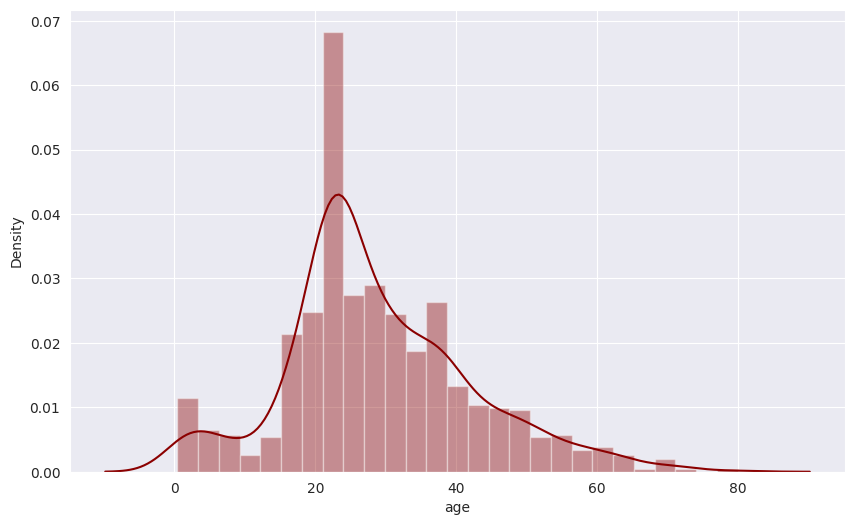

In [28]:
plt.figure(figsize = (10,6))
sns.distplot(df["age"], color = "darkred")

<Axes: xlabel='fare', ylabel='Density'>

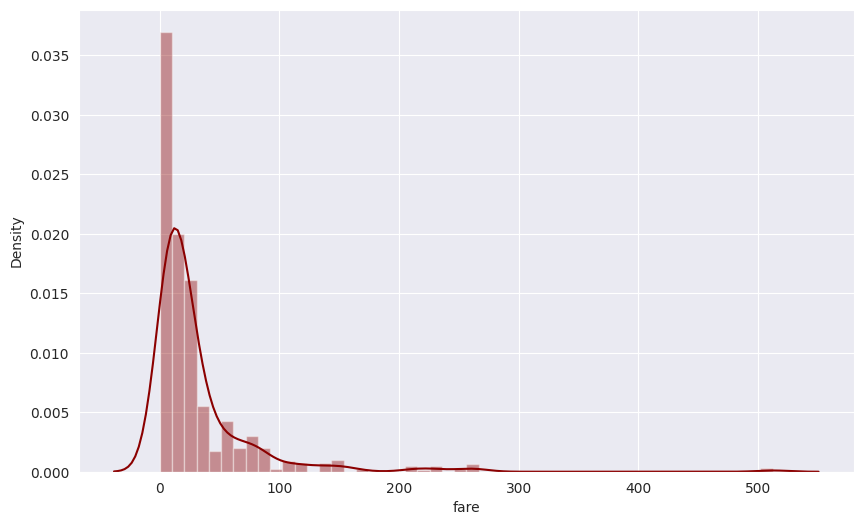

In [29]:
plt.figure(figsize = (10,6))
sns.distplot(df["fare"], color = "darkred")

<Axes: >

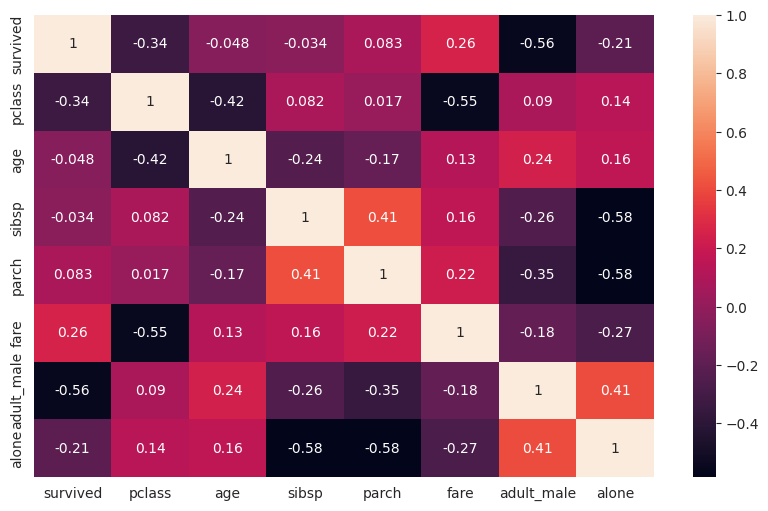

In [30]:
plt.figure(figsize = (10,6))
#sns.heatmap(df.corr(), annot = True)
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [31]:
df.drop(["age", "sibsp", "parch"], axis = 1, inplace = True)

In [32]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


In [33]:
sex = pd.get_dummies(df["sex"], drop_first = True)
print("SEX: ")
sex.info()

who = pd.get_dummies(df["who"], drop_first = True)
print("WHO: ")
who.info()

#adult_male = pd.get_dummies(df["adult_male"], drop_first = True)
adult_male = pd.get_dummies(df["adult_male"], drop_first = True, prefix = "adult_male")
print("ADULT MALE: ")
adult_male.info()

embark_town = pd.get_dummies(df["embark_town"], drop_first = True)
print("EMBARK TOWN: ")
embark_town.info()

#alone = pd.get_dummies(df["alone"], drop_first = True)
alone = pd.get_dummies(df["alone"], drop_first = True, prefix = "alone")
print("ALONE: ")
alone.info()

SEX: 
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   male    889 non-null    bool 
dtypes: bool(1)
memory usage: 7.8 KB
WHO: 
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   man     889 non-null    bool 
 1   woman   889 non-null    bool 
dtypes: bool(2)
memory usage: 8.7 KB
ADULT MALE: 
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   adult_male_True  889 non-null    bool 
dtypes: bool(1)
memory usage: 7.8 KB
EMBARK TOWN: 
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  ---

In [34]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


In [35]:
df = pd.concat ([df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1), sex, who, adult_male, embark_town, alone], axis = 1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   survived         889 non-null    int64  
 1   pclass           889 non-null    int64  
 2   fare             889 non-null    float64
 3   male             889 non-null    bool   
 4   man              889 non-null    bool   
 5   woman            889 non-null    bool   
 6   adult_male_True  889 non-null    bool   
 7   Queenstown       889 non-null    bool   
 8   Southampton      889 non-null    bool   
 9   alone_True       889 non-null    bool   
dtypes: bool(7), float64(1), int64(2)
memory usage: 33.9 KB


,survived,pclass,fare,male,man,woman,adult_male_True,Queenstown,Southampton,alone_True
0,0,3,7.2500,True,True,False,True,False,True,False
1,1,1,71.2833,False,False,True,False,False,False,False
2,1,3,7.9250,False,False,True,False,False,True,True
3,1,1,53.1000,False,False,True,False,False,True,False
4,0,3,8.0500,True,True,False,True,False,True,True


In [36]:
#df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1, inplace = True)

In [37]:
df.head()

,survived,pclass,fare,male,man,woman,adult_male_True,Queenstown,Southampton,alone_True
0,0,3,7.2500,True,True,False,True,False,True,False
1,1,1,71.2833,False,False,True,False,False,False,False
2,1,3,7.9250,False,False,True,False,False,True,True
3,1,1,53.1000,False,False,True,False,False,True,False
4,0,3,8.0500,True,True,False,True,False,True,True


# **Modelling**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#df.drop("True", axis = 1, inplace = True)
df.info()
X = df.drop("survived", axis = 1)
y = df["survived"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   survived         889 non-null    int64  
 1   pclass           889 non-null    int64  
 2   fare             889 non-null    float64
 3   male             889 non-null    bool   
 4   man              889 non-null    bool   
 5   woman            889 non-null    bool   
 6   adult_male_True  889 non-null    bool   
 7   Queenstown       889 non-null    bool   
 8   Southampton      889 non-null    bool   
 9   alone_True       889 non-null    bool   
dtypes: bool(7), float64(1), int64(2)
memory usage: 33.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pclass           889 non-null    int64  
 1   fare             889 non-null    float64
 2   

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr_model = LogisticRegression()

In [43]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = lr_model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       141
           1       0.68      0.79      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.79       223



In [47]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [48]:
cnf_matrix

array([[111,  30],
       [ 17,  65]])